In [65]:
import openai
import os
from langgraph.graph import Graph

In [72]:
from dotenv import load_dotenv
import os

load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

client = openai.OpenAI(api_key=OPENAI_API_KEY)


In [73]:
# ✅ Define Image Generation State (Using Dictionary)
def get_user_input(state: dict) -> dict:
    """Get user input for the image topic."""
    if "topic" not in state or not state["topic"]:
        state["topic"] = input("Enter a topic for image generation: ")
    return state

In [74]:
def generate_image_prompt(state: dict) -> dict:
    """Generate an AI-friendly prompt for DALL·E."""
    state["prompt"] = f"A highly detailed, realistic image of {state['topic']}, cinematic lighting, 4K resolution."
    return state

In [75]:
def generate_image(state: dict) -> dict:
    """Generate an image using OpenAI DALL·E with the new API format."""
    try:
        response = client.images.generate(
            model="dall-e-3",  # Use latest DALL·E model
            prompt=state["prompt"],
            n=1,
            size="1024x1024"
        )
        state["image_url"] = response.data[0].url
        print(f"✅ Image generated successfully: {state['image_url']}")
    except Exception as e:
        print(f"❌ Error generating image: {e}")
        state["image_url"] = None
    return state

In [76]:

# ✅ Build Workflow with LangGraph
workflow = Graph()

In [77]:
# ✅ Add Nodes
workflow.add_node("user_input", get_user_input)
workflow.add_node("generate_prompt", generate_image_prompt)
workflow.add_node("generate_image", generate_image)

In [78]:
# ✅ Add Start Node (Fixes EntryPoint Issue)
workflow.set_entry_point("user_input")

# ✅ Define Workflow Edges
workflow.add_edge("user_input", "generate_prompt")
workflow.add_edge("generate_prompt", "generate_image")

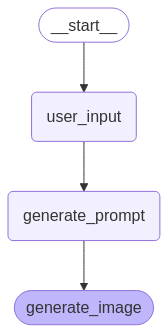

In [79]:
# ✅ Compile Workflow
app = workflow.compile()
app

In [80]:
# ✅ Run Workflow
initial_state = {}  # Start with an empty state (using dictionary)
output = app.invoke(initial_state)

# ✅ Display the Generated Image URL
if output.get("image_url"):
    print(f"🖼️ Generated Image URL: {output['image_url']}")
else:
    print("⚠️ No image was generated.")

✅ Image generated successfully: https://oaidalleapiprodscus.blob.core.windows.net/private/org-OeqBlvRCiyIFsTn1edhBsquW/user-bR0mX4A7dwu7tUPUiaSbrlMP/img-gX4SlDBlRKyRWuOCr4K2GTBy.png?st=2025-03-24T19%3A16%3A00Z&se=2025-03-24T21%3A16%3A00Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-03-24T19%3A03%3A57Z&ske=2025-03-25T19%3A03%3A57Z&sks=b&skv=2024-08-04&sig=fnfOBgsuadGU0/A000cQtMdACa7szeWZMs1ceI9Rrio%3D


AttributeError: 'NoneType' object has no attribute 'get'